<a href="https://colab.research.google.com/github/dude123studios/AdvancedGenerativeLearning/blob/main/Probabilistic_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
import tempfile
import urllib
gcs_base_dir = "gs://celeb_a_dataset/"
celeb_a_builder = tfds.builder("celeb_a", data_dir=gcs_base_dir, version='2.0.0')

celeb_a_builder.download_and_prepare()

num_test_shards_dict = {'0.3.0': 4, '2.0.0': 2} # Used because we download the test dataset separately
version = str(celeb_a_builder.info.version)
print('Celeb_A dataset version: %s' % version)

local_root = tempfile.mkdtemp(prefix='test-data')
def local_test_filename_base():
  return local_root

def local_test_file_full_prefix():
  return os.path.join(local_test_filename_base(), "celeb_a-test.tfrecord")

def copy_test_files_to_local():
  filename_base = local_test_file_full_prefix()
  num_test_shards = num_test_shards_dict[version]
  for shard in range(num_test_shards):
    url = "https://storage.googleapis.com/celeb_a_dataset/celeb_a/%s/celeb_a-test.tfrecord-0000%s-of-0000%s" % (version, shard, num_test_shards)
    filename = "%s-0000%s-of-0000%s" % (filename_base, shard, num_test_shards)
    res = urllib.request.urlretrieve(url, filename)

celeb_a_test_data = celeb_a_builder.as_dataset(split='test')
# Copy test data locally to be able to read it into tfma
copy_test_files_to_local()

Celeb_A dataset version: 2.0.0


In [4]:
sample_size = 2000
ds_train = celeb_a_test_data.batch(sample_size)
features = next(iter(ds_train.take(1)))
n, h, w, c = features['image'].shape

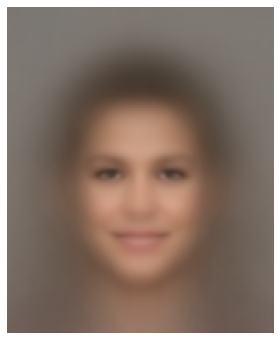

In [5]:
figure = plt.figure(figsize=(8,6))
sample_images = features['image']
new_image = np.mean(sample_images, axis=0)
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [6]:
def sample(attribs):
    def _compare_attributes(i):
        for attrib in attribs:
            if not features['attributes'][attrib][i]:
                return False
        return True

    return np.array([features['image'][i] for i in range(sample_size) if _compare_attributes(i)])

In [7]:
def sample_dataset(req_attribs):
    def sample_batch(features, attribs):
        def _compare_attributes(i):
            for attrib in attribs:
                if not features['attributes'][attrib][i]:
                    return False
            return True

        return np.array([features['image'][i] for i in range(sample_size) if _compare_attributes(i)])
    
    samples = None
    for features in ds_train.take(9):
        mini_samples = sample_batch(features, req_attribs)
        if samples is not None:
            samples = np.append(samples, mini_samples, axis=0)
        else:
            samples = mini_samples

    return samples

In [8]:
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

attributes {'Male': True}
sample size: 6956


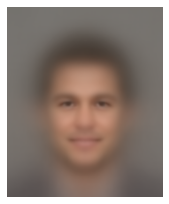

attributes {'Male': True, 'Eyeglasses': True}
sample size: 862


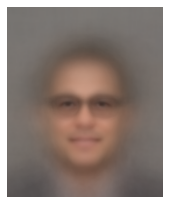

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True}
sample size: 122


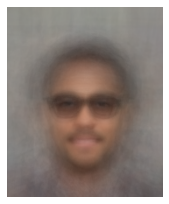

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True, 'Smiling': True}
sample size: 48


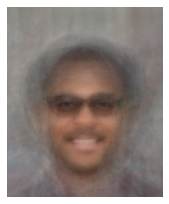

In [9]:
attributes_dict = {'Male':True, 
                   'Eyeglasses':True,
                   'Mustache':True,
                   'Smiling':True}
show_attribs = {}
for k, v in attributes_dict.items():
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    print("attributes", show_attribs)
    print("sample size:",len(sample_images))
    new_image = np.mean(sample_images, axis=0)
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image.astype(np.uint8))
    plt.show()

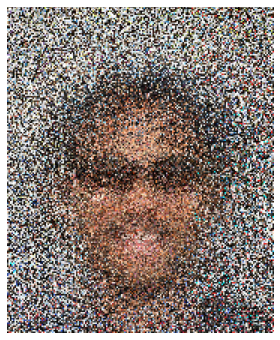

In [10]:
new_image = np.zeros(sample_images.shape[1:], dtype=np.uint8)
for i in range(h):
    for j in range(w):
        rand_int = np.random.randint(0, sample_images.shape[0])
        new_image[i, j] = sample_images[rand_int, i, j]

figure = plt.figure(figsize=(8,6))
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()